<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0729_57%EC%9D%BC%EC%B0%A8_ML(Lasso%2C_ElasticNet_Logistic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

In [3]:
from sklearn import datasets
boston = datasets.load_boston()

y_target = pd.DataFrame(boston.target, columns = ['PRICE'])

X_data = pd.DataFrame(boston.data, columns = boston.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
y_target.shape, X_data.shape

((506, 1), (506, 13))

Ridge = RSS + L2 Norm Reg.

Lasso = RSS + L1 Norm

ElasticNet = RSS + L1 Norm + L2 Norm Reg.

In [6]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [7]:
def get_linear_reg_eval(model_name, params=None, X_data = None, y_target=None):
    coeff_df = pd.DataFrame()
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        if model_name == 'Lasso' : model = Lasso(alpha=param)
        if model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7) # alpha 변화를 위해 0.7로 고정
        model.fit(X_data, y_target)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(param, ' : ', avg_rmse)
    return coeff_df

In [8]:
alphas = [0.07, 0.1, 0.5, 1, 3]

In [9]:
result = get_linear_reg_eval('Lasso', params=alphas, X_data=X_data, y_target=y_target)

0.07  :  5.612284267526676
0.1  :  5.615116035266935
0.5  :  5.6691234095948975
1  :  5.776020813823376
3  :  6.1887632108009045


In [10]:
result.sort_values(by=result.columns[0], ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#Elastic Net

ElasticNet = RSS + L1 Norm + L2 Norm Reg. = RSS + a L1 + b L2

alpha = a + b =1

l1_ratio = a / (a+b) =0.7

a = 0.7, b=0.3

alpha = 1.0

l1_ratio = 0.5

In [11]:
result = get_linear_reg_eval('ElasticNet', params=alphas, X_data=X_data, y_target=y_target)

0.07  :  5.541654347348139
0.1  :  5.525928496294909
0.5  :  5.466748649445586
1  :  5.596874445109748
3  :  6.068121638621163


In [12]:
result.sort_values(by=result.columns[0], ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


#로그 변환

데이터 변환 방법

표준화 (평균 0, 분산 1), 정규화 (최대, 최솟값 0 ~ 1) : 효과가 적을 수 있다.

PolynomialFeatures 로 다항 특성 적용 : 회귀계수가 많아져 과적합 될 수 있다.

로그 변환

In [13]:
np.log(100)

4.605170185988092

In [14]:
np.log(1+100)

4.61512051684126

In [15]:
np.log1p(100)

4.61512051684126

In [16]:
np.expm1(4.61512051684126)

100.00000000000003

In [17]:
np.log1p(10)

2.3978952727983707

In [19]:
np.expm1(np.log1p(10))

10.000000000000002

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def get_scaled_data(method=None, p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [21]:
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax',2), ('Log', None)]

In [22]:
alphas = [0.1, 1, 10, 100]

In [23]:
def get_linear_reg_eval(model_name, params=None, X_data = None, y_target=None):
    param_avg_rmse_dict = {}
    for param in params:
        if model_name == 'Ridge' : model = Ridge(alpha=param)
        if model_name == 'Lasso' : model = Lasso(alpha=param)
        if model_name == 'ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7) # alpha 변화를 위해 0.7로 고정
        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        param_avg_rmse_dict[param] = avg_rmse
    return param_avg_rmse_dict

In [24]:
result_dict = {}
for sm in scale_methods:
    X_data_scaled = get_scaled_data(method=sm[0], p_degree=sm[1], input_data=X_data)
    result=get_linear_reg_eval('Ridge', params=alphas, X_data=X_data_scaled, y_target=y_target)
    result_dict[str(sm)]=result

In [25]:
result_dict

{"('Log', None)": {0.1: 4.770429614681662,
  1: 4.676227018966879,
  10: 4.83643999263527,
  100: 6.240916232719036},
 "('MinMax', 2)": {0.1: 5.297560003127215,
  1: 4.322660371524888,
  10: 5.185204257580534,
  100: 6.537866889704364},
 "('MinMax', None)": {0.1: 5.763570225288303,
  1: 5.465045081564939,
  10: 5.754163637679424,
  100: 7.634919863623539},
 "('Standard', 2)": {0.1: 8.82723587299817,
  1: 6.871287525963486,
  10: 5.484870425533477,
  100: 4.634437778261921},
 "('Standard', None)": {0.1: 5.8259927993894465,
  1: 5.802889517257744,
  10: 5.636831222559072,
  100: 5.421374711794966},
 '(None, None)': {0.1: 5.7884866270324125,
  1: 5.6525709656135446,
  10: 5.518166280868973,
  100: 5.329589628472147}}

#LogisticRegression

In [26]:
x = np.arange(-10, 10, 0.1)

In [27]:
def step_func(x):
    y = x>0
    y = y.astype(int)
    return y

In [30]:
y1 = sigmoid(x)
y2 = step_func(x)

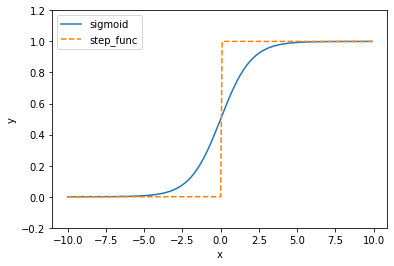

In [31]:
plt.plot(x, y1, label= 'sigmoid')
plt.plot(x, y2, linestyle='--', label='step_func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-0.2, 1.2)
plt.show()

In [29]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

로지스틱 함수

$$
π(x) = {1 \over 1+e^-(ß_0 + ß_1x)}
$$
여기서,
$$
π(x) = 1이 될 확률
$$
이될확률
odds = 승산비 = (1이 될 확률) / (0이 될 확률)
$$
odds = {π(x) \over 1 - π(x)}
$$
 
$${\pi (x) \over 1 - \pi (x)} = \frac{1 \over 1+e^{-(\beta_0+\beta_1 x)}}{1-{1 \over 1+e^{-(\beta_0+\beta_1 x)}}}
=e^{(\beta_0 + \beta_1 x)}$$

odds 에 ln을 취해 보자

$$
ln(odds) = ln{(π \over 1-\pi)} = ß_0 + ß_1x
$$
where, logit = ln (odds)

로지스틱변환 : 로지스틱함수에 Odds 취하고, Log 변환 하는 것을 말한다.